<a href="https://colab.research.google.com/github/PeruVinayak/DSML_Projects/blob/main/Jamboree_Education_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= purple> <font size = -0.25> <b> About Jamboree: </b> </font>

<font color=black>

* Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.

* To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

* By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.

# <font color= purple> <font size = -0.25>  <b> Business problem:</b> </font>

<font color=black>

* Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.


In [ ]:
# importing required/common libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O Jamboree_Admission.csv

--2024-12-01 07:09:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.210, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2024-12-01 07:09:22 (220 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



# <font color= purple> <font size = -0.25>  <b> Column Profiling:</b> </font>

<font color=black>

* Serial No. (Unique row ID)
* GRE- Graduate Record Examination Scores (out of 340)
* TOEFL- Test of English as a Foreign Language Scores (out of 120)
* University Rating (out of 5)
* SOP- Statement of Purpose & LOR- Letter of Recommendation Strength (out of 5)
* Undergraduate GPA-Grade Point Average (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [ ]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# <font color= purple> <font size = -0.25>  <b> Checking the structure & characteristics of the dataset:</b> </font>

In [ ]:
# Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Shape of the dataset
df.shape

(500, 9)

In [ ]:
# Null values check
df.isna().sum().sum()

0

Dropping the unique row Identifier (Serial No.) and it is important as we don't want our model to be biased i.e build some understanding based on row numbers.

In [ ]:
df.drop(columns='Serial No.',inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 8)

In [ ]:
# Statistical summary
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# <font color= purple> <font size = -0.25>  <b> **Univariate Analysis** </b> </font>


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# As we can see the few column headers has trailing spaces, we will get rid of it.
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

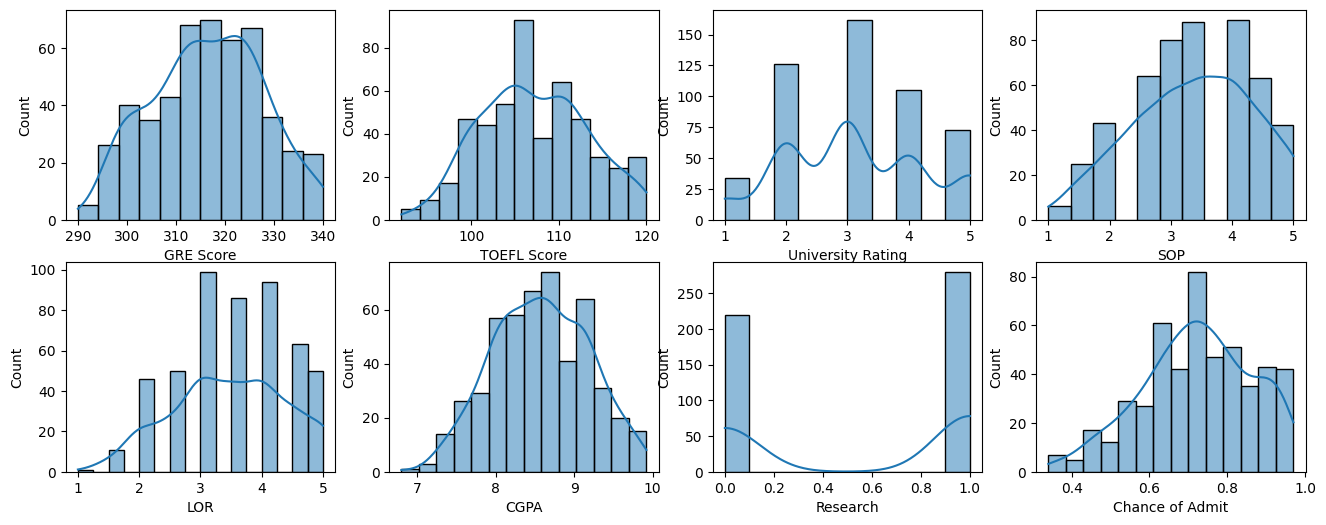

In [ ]:
# Analyzing the distribution of each variables
fig = plt.figure(figsize = (16,6))

n_list = df.columns

for pos,col in enumerate(n_list):
    plt.subplot(2,4,pos+1)
    sns.histplot(df[col], kde=True)
plt.show()

<font color= purple> <b>Insights</b> </font>

* Numerical variables 'CGPA' and 'GRE Score' are almost follows normal distribution in the given dataset.

# <font color= purple> <font size = -0.25>  <b> **Bivariate Analysis** </b> </font>


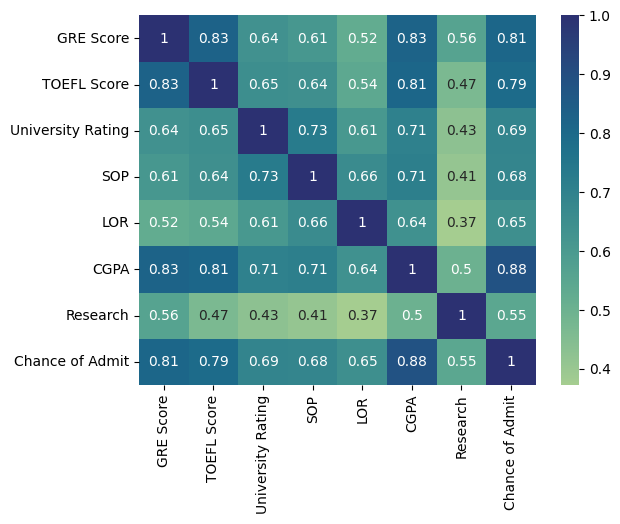

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

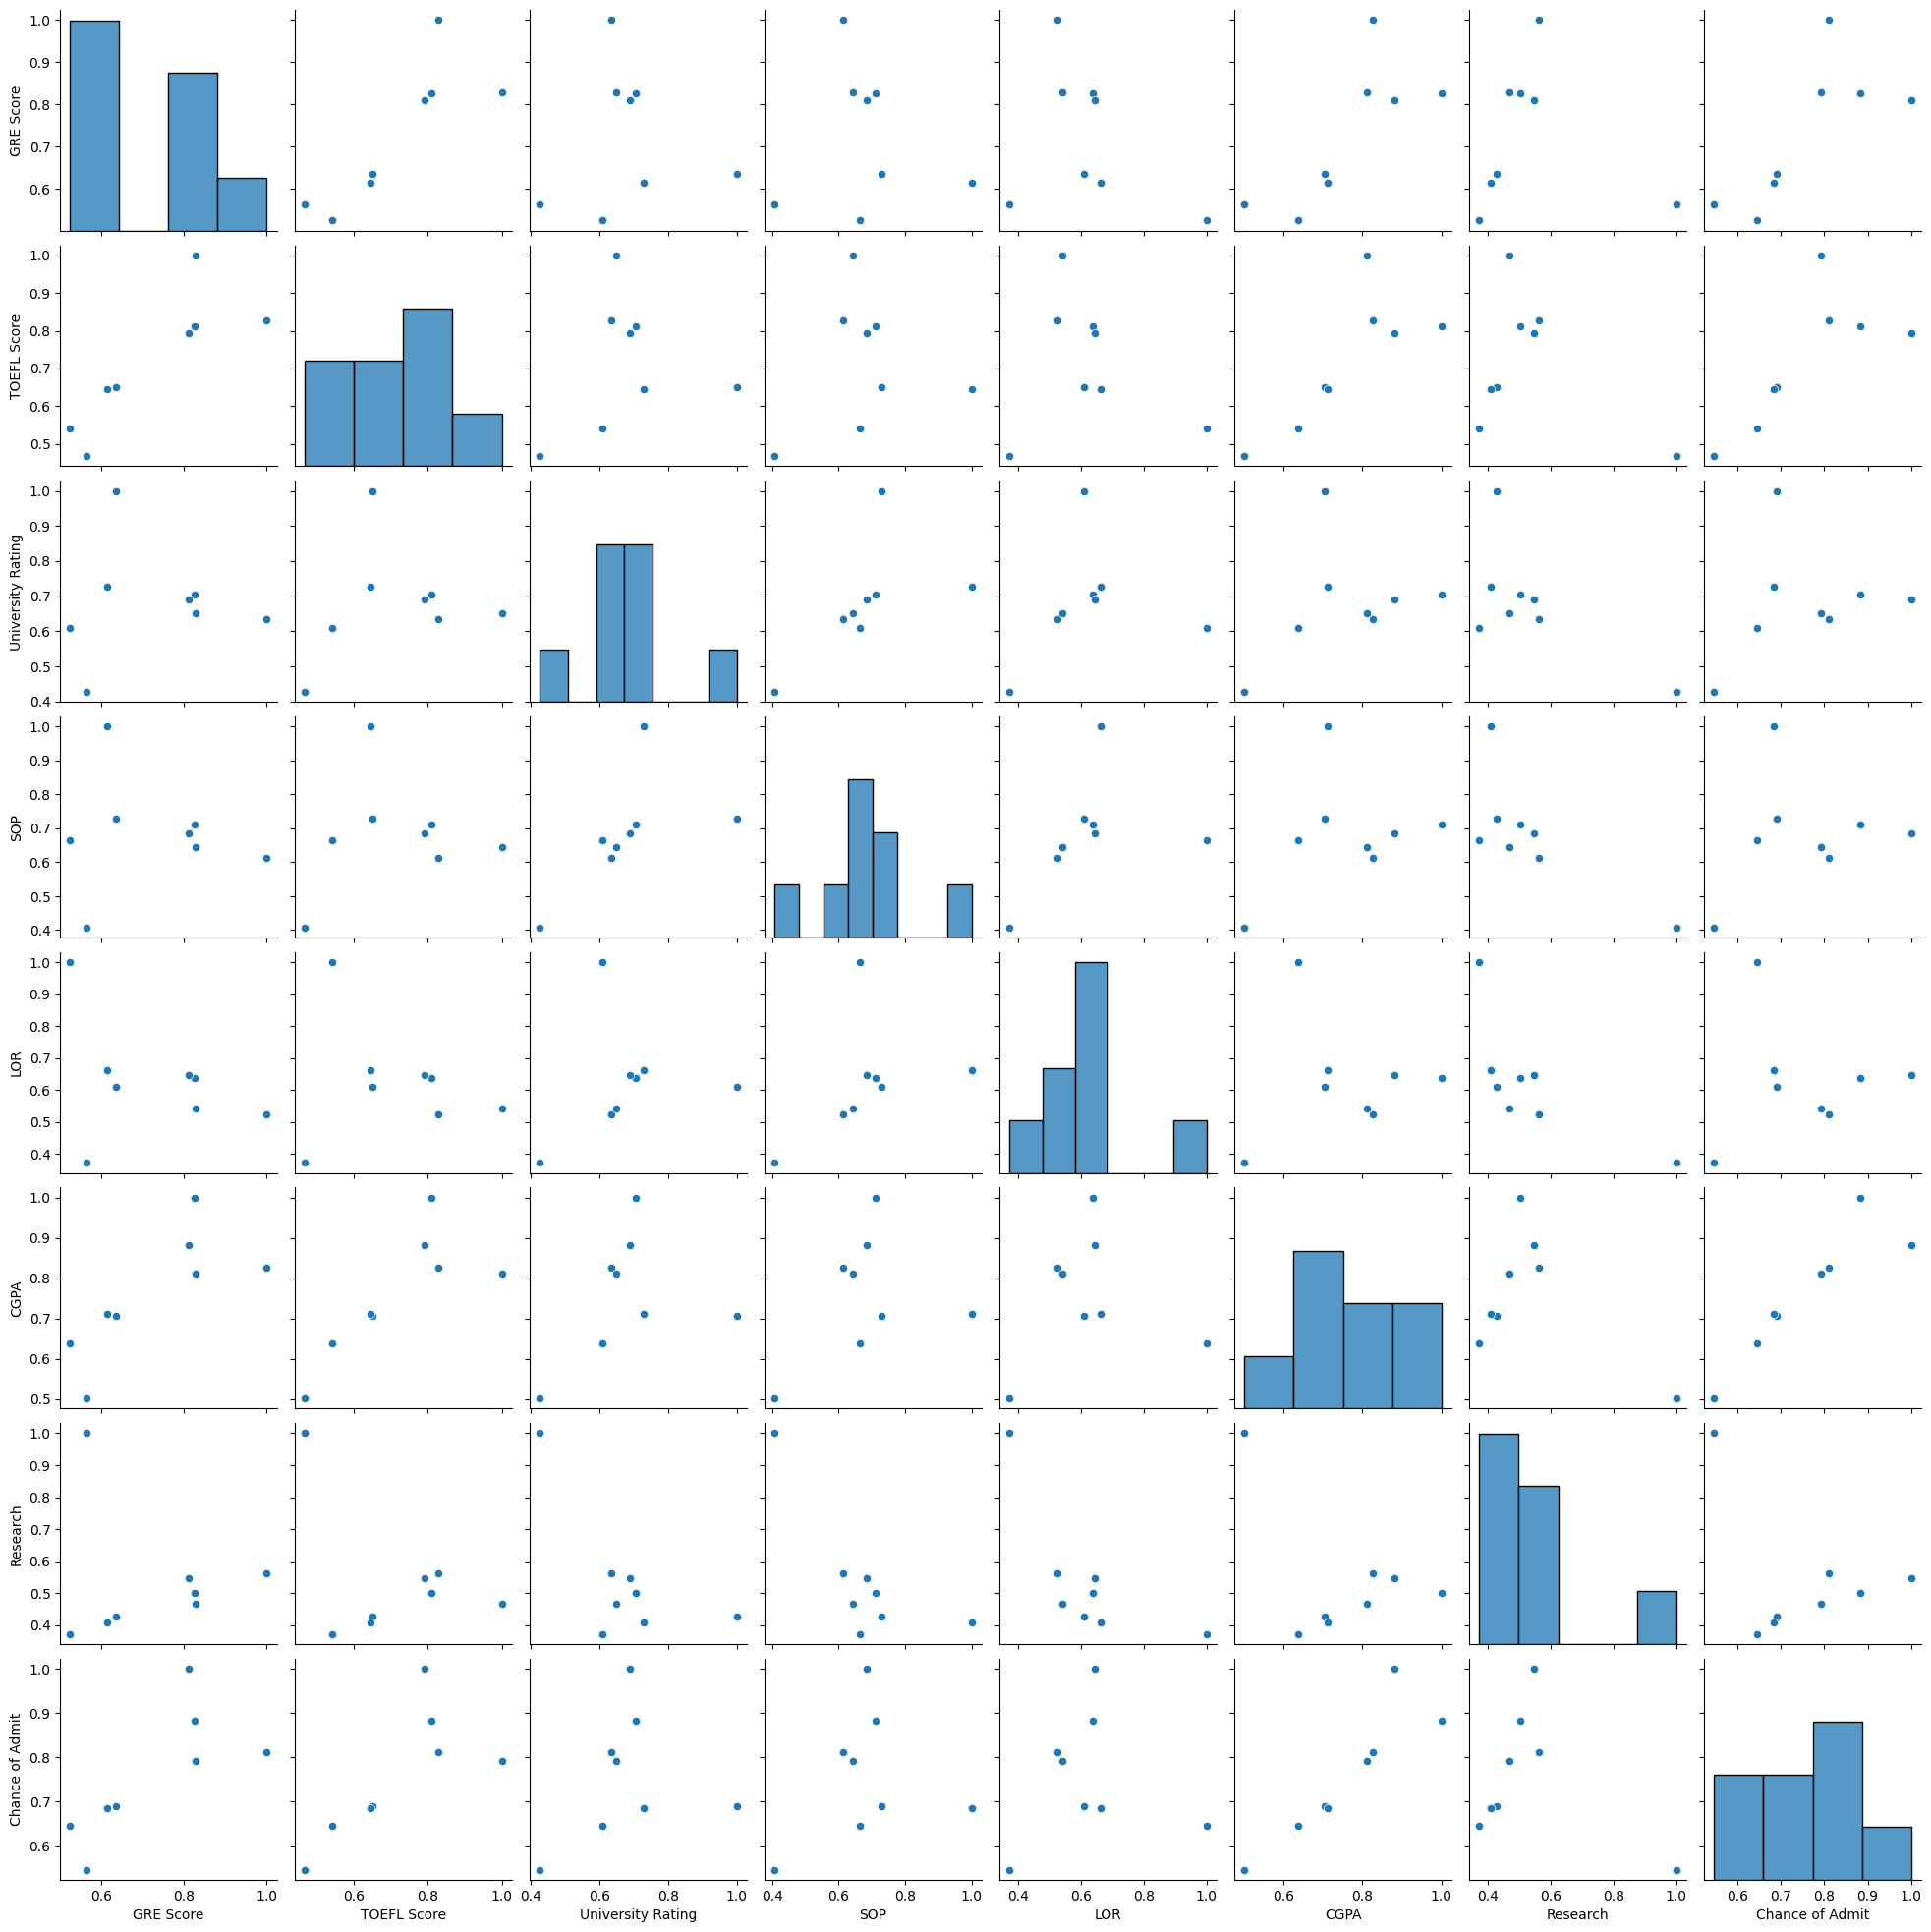

In [ ]:
sns.pairplot(df.corr())

<font color= purple> <b>Insights</b> </font>

* Using heatmap and pairplot, we can understand that the chance of getting admission is very high if the student has good CGPA and moderately high for GRE Score & TOEFL Score.

# <font color= purple> <font size = -0.25>  <b> Data Preprocessing:</b> </font>

In [ ]:
# Checking duplicates
df.duplicated().sum()

0

In [ ]:
# Checking missing values
df.isnull().sum().sum()

0

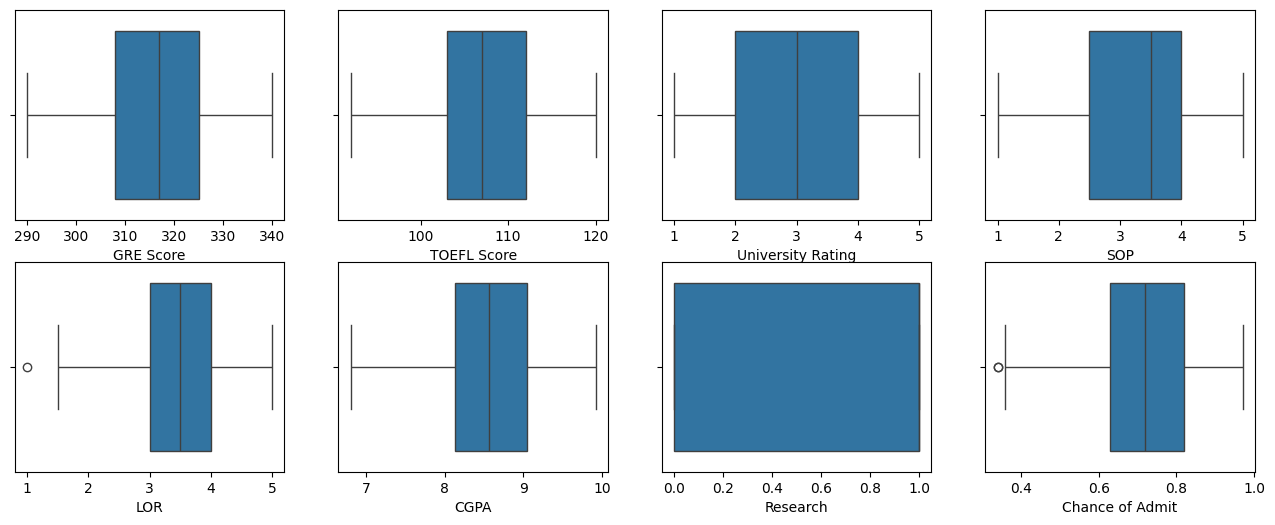

In [ ]:
fig = plt.figure(figsize = (16,6))

n_list = df.columns

for pos,col in enumerate(n_list):
    plt.subplot(2,4,pos+1)
    sns.boxplot(df[col],orient='h')
plt.show()

<font color= purple> <b>Insights</b> </font>

* Using boxplots, we could see that there are no outliers in the dataset and which is good.

# <font color= purple> <font size = -0.25>  <b> Check the correlation among independent variables and how they interact with each other. </b> </font>


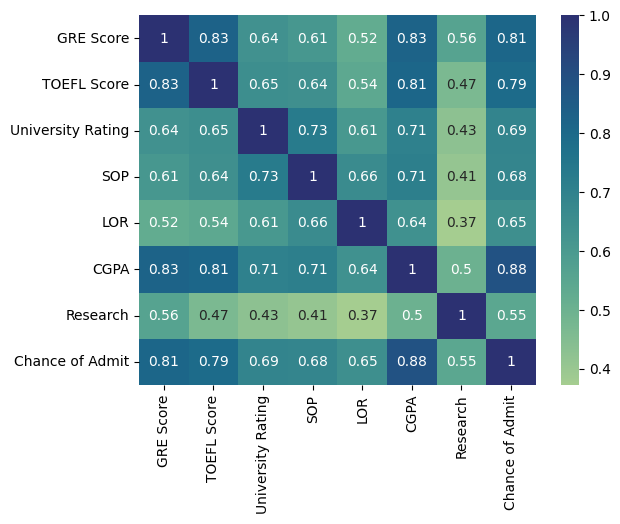

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

<font color= purple> <b>Insights</b> </font>

* As per the above correlation matrix/heatmap, we do not find any feature that has a high correlation (>0.90) with some other feature.

# <font color= purple> <font size = -0.25>  <b> Preparing the data for modeling: </b> </font>

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# As there is no categorical variables in the dataset, there is no need of encoding

In [ ]:
# Defining Independant variables(X) and Dependant variable(y)
X = df.drop('Chance of Admit', axis=1)
y = df["Chance of Admit"]

In [ ]:
# Performing the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Performing the data normalization/standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

# X_tr_scaled --> Scaled features

# <font color= purple> <font size = -0.25>  <b> Build the Linear Regression model: </b> </font>

In [ ]:
# By default the Statmodels will not have intercept, so to add intercept we need to add constant
import statsmodels.api as sm
X_sm = sm.add_constant(X_tr_scaled)

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     265.1
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          2.29e-144
Time:                        07:10:02   Log-Likelihood:                 559.41
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7184      0.003    238.023      0.0

In [ ]:
lst = []
for feature,p_value in enumerate(sm_model.pvalues):
    if p_value > 0.05:
        lst.append("x"+str(feature))
print(f" Features with p-value > 0.05 {lst}")

 Features with p-value > 0.05 ['x2', 'x3', 'x4']


In [ ]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

* As per the model statistics, features x2 (TOEFL Score), x3 (University Rating) and x4 (SOP) has p-value >0.05 hence lets drop them and re-train the model.

In [ ]:
# Dropping the features
X = X.drop(['TOEFL Score', 'University Rating', 'SOP'], axis=1)
X.head(2)

,GRE Score,LOR,CGPA,Research
0,337,4.5,9.65,1
1,324,4.5,8.87,1


In [ ]:
# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Performing the data normalization/standardization
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          2.74e-146
Time:                        07:10:02   Log-Likelihood:                 554.71
No. Observations:                 400   AIC:                            -1099.
Df Residuals:                     395   BIC:                            -1079.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7184      0.003    236.142      0.0

<font color= purple> <b>Insights</b> </font>

* We can clearly see that there is no much difference in the R-squared & Adj. R-squared values even after dropping the features.

# <font color= purple> <font size = -0.25>  <b> Assumptions of Linear Regression: </b> </font>

**Multicollinearity check by VIF score:**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CGPA,3.89
0,GRE Score,3.46
1,LOR,1.71
3,Research,1.51


<font color= purple> <b>Insights</b> </font>

* None of the features having the VIF score > 5.

**Note :** VIF values tends to be infinity when there is a perfect correlation between the variables

**Mean of residuals:**

In [ ]:
# Mean of residuals should be close to zero, let's check that.

Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

print(errors.mean())

4.299338662860919e-16


* This confirms the mean of residual is actually closer to zero.

**Linear relationship between independent & dependent variables:**

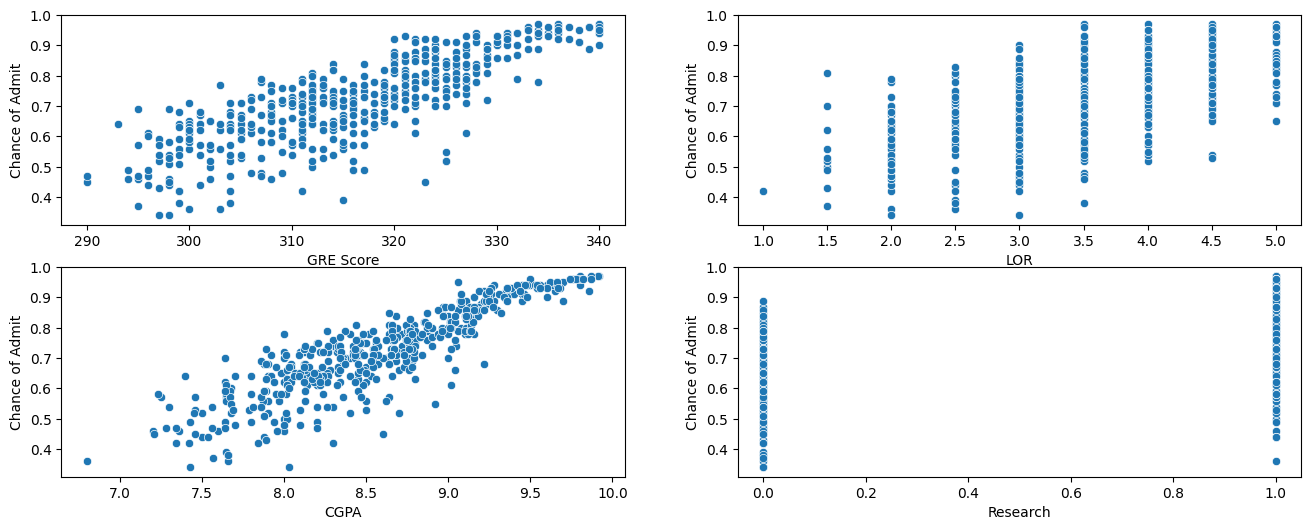

In [ ]:
fig = plt.figure(figsize = (16,6))

for pos,col in enumerate(X_train.columns):
    plt.subplot(2,2,pos+1)
    sns.scatterplot(data=df, x=col, y=y)
plt.show()

In [ ]:
from scipy.stats import pearsonr
for pos,col in enumerate(X.columns):
    res = pearsonr(X[col],y)
    print(f"Pearson correlation between {X.columns[pos]} and Chance of Admit is: ",round(res[0],2))

Pearson correlation between GRE Score and Chance of Admit is:  0.81
Pearson correlation between LOR and Chance of Admit is:  0.65
Pearson correlation between CGPA and Chance of Admit is:  0.88
Pearson correlation between Research and Chance of Admit is:  0.55


<font color= purple> <b>Insights</b> </font>

* Both scatterplot and pearson correlation methods confirmed that there is a linear relation between independant variables (CGPA, GRE Score) and dependant variable (Chance of Admit).
* However, There is no linear relationship for the variables LOR & Research with dependant variable (Chance of Admit).  

**Test for Homoscedasticity**

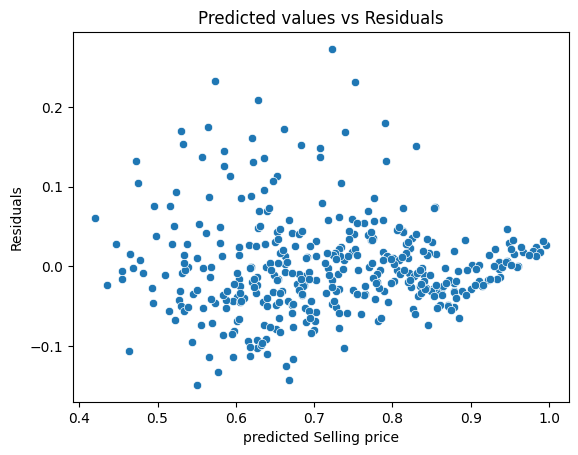

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.show()

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.0427842523984627), ('p-value', 0.38509529576855167)]

<font color= purple> <b>Insights</b> </font>

From the goldfeld-quandt test:

* F Statistic comes out to be 1.04 => Implying minimal difference in variance between groups p-value of 0.385 i.e p-value>0.05 indicates that there is no strong evidence of heteroscedasticity and hence, the presence of Homoscedasticity is validated.

**Normality of residuals:**

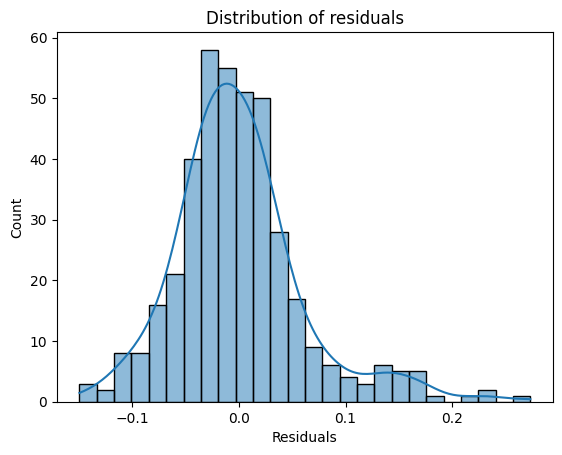

In [ ]:
sns.histplot(errors,kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of residuals")
plt.show()

<font color= purple> <b>Insights</b> </font>

* We can see almost the bell-shaped curve in residuals distribution with 0 mean, Let's do a normality test using Shapiro-wilks' method to check if the distribution is actually normal.

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
round(res.statistic,2)

0.94

<font color= purple> <b>Insights</b> </font>

* The test statistics value closer to 1 indicates the level of normality. In this case, a value of 0.94 denotes a high level of normality for the error distribuiton.

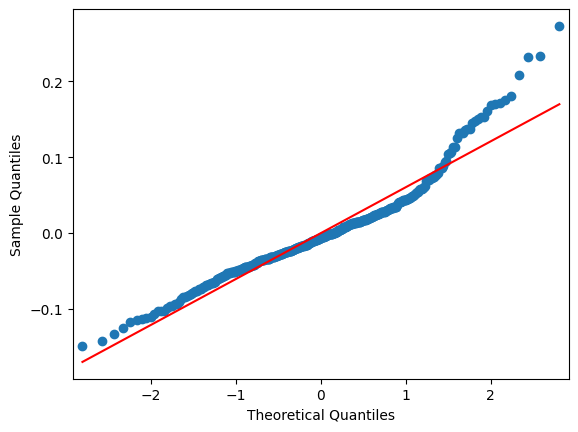

In [ ]:
# Also, lets check the same using qq plot
from statsmodels.graphics.gofplots import qqplot

qqplot(errors, line='s')
plt.show()

# <font color= purple> <font size = -0.25>  <b> Evaluate the model's performance: </b> </font>


In [ ]:
# MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error as mae

err = mae(y_train, Y_hat)
print(f"Mean absolute error: {round(err,3)}")

Mean absolute error: 0.044


In [ ]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error as mse

err = mse(y_train, Y_hat)
rmse = np.sqrt(err)
print(f"Root Mean Square Error (RMSE): {round(rmse,3)}")

Root Mean Square Error (RMSE): 0.06


In [ ]:
# R2 score / R-squared value
from sklearn.metrics import r2_score as r2

r2_err = r2(y_train, Y_hat)
print(f"R2 score for model is: {round(r2_err,3)}")

R2 score for model is: 0.821


In [ ]:
# Adjusted R-squared value
n = len(X_test) # n is number of observations
k = X_test.shape[1] # No.of predictor variables (i.e) features
adj_r2 = 1 - ((1-r2_err) * ((n-1)/(n-k-1)))
print(f"Adj. R2 score for model is: {round(adj_r2,3)}")

Adj. R2 score for model is: 0.814


# <font color= purple> <font size = -0.25>  <b> Recommendations: </b> </font>


* 'GRE Score', 'LOR', 'CGPA' and 'Research' are the required variables which are important in making the prediction for Chance of Admit.
* However, 'CGPA' is the most important varibale in making the prediction for the Chance of Admit.
* Following are the final model results on the test data:
    1. RMSE: 0.04
    2. MAE: 0.06
    3. R2_score: 0.82
    4. Adjusted_R2: 0.81